In [4]:
import pandas as pd

In [5]:
path = '../../../../src/main/resources/HousingPricesDataset/train_lf_la_ls_ys_st_sc.csv'

In [6]:
data = pd.read_csv(path)

In [7]:
data.head(n=10)

,65.0,8450,Reg,2008,WD,Normal,208500
0,80.0,9600,Reg,2007,WD,Normal,181500
1,68.0,11250,IR1,2008,WD,Normal,223500
2,60.0,9550,IR1,2006,WD,Abnorml,140000
3,84.0,14260,IR1,2008,WD,Normal,250000
4,85.0,14115,IR1,2009,WD,Normal,143000
5,75.0,10084,Reg,2007,WD,Normal,307000
6,51.0,6120,Reg,2008,WD,Abnorml,129900
7,50.0,7420,Reg,2008,WD,Normal,118000
8,70.0,11200,Reg,2008,WD,Normal,129500
9,85.0,11924,IR1,2006,New,Partial,345000


In [10]:
data.columns=['LotFrontage','LotArea','LotShape','YrSold','SaleType','SaleCondition','SalePrice']

In [13]:
data.head()

,LotFrontage,LotArea,LotShape,YrSold,SaleType,SaleCondition,SalePrice
0,80.0,9600,Reg,2007,WD,Normal,181500
1,68.0,11250,IR1,2008,WD,Normal,223500
2,60.0,9550,IR1,2006,WD,Abnorml,140000
3,84.0,14260,IR1,2008,WD,Normal,250000
4,85.0,14115,IR1,2009,WD,Normal,143000


In [14]:
data_lotFrontage = data[['LotFrontage','SalePrice']]

In [15]:
data_lotFrontage.sort_values(['LotFrontage'], inplace=True)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
%matplotlib inline

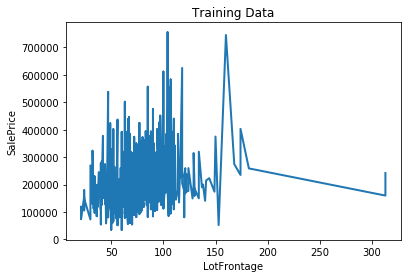

In [19]:
import matplotlib.pyplot as plt
pop = data_lotFrontage['LotFrontage']
prof = data_lotFrontage['SalePrice']
fig = plt.plot(pop, prof, lw=2)
plt.title('Training Data')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

In [40]:
data_lotArea = data[['LotArea','SalePrice']]
data_lotArea.sort_values(['LotArea'], inplace=True)
data_lotArea.head()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LotArea,SalePrice
790,1300,124000
855,1477,80000
509,1491,75500
403,1526,86000
854,1533,97000


In [52]:
data_lotArea[['LotArea']]

,LotArea
790,1300
855,1477
509,1491
403,1526
854,1533
1189,1533
63,1596
189,1680
696,1680
1061,1680


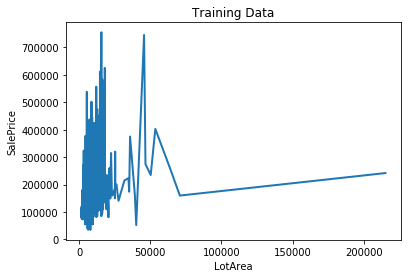

In [41]:
import matplotlib.pyplot as plt
pop = data_lotArea['LotArea']
prof = data_lotFrontage['SalePrice']
fig = plt.plot(pop, prof, lw=2)
plt.title('Training Data')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

In [42]:
pred_path= '../../../../src/main/resources/HousingPricesDataset/predictions.csv'


In [43]:
data1 = pd.read_csv(path)
data1.columns=['LotFrontage','LotArea','LotShape','YrSold','SaleType','SaleCondition','SalePrice']
data1_lotFrontage=data1[['LotFrontage','SalePrice']]

In [44]:
data2 = pd.read_csv(pred_path)
data2.columns=['PredictedPrice']
data2.head(10)

,PredictedPrice
0,174637.817690
1,204888.307890
2,154761.235255
3,257019.898768
4,245700.250521
5,173999.722615
6,123295.751148
7,139852.307180
8,164366.887514
9,271802.210509


In [45]:
#data2 = pd.read_csv(pred_data)
raw_data = {
        'LotFrontage': data1['LotFrontage'],
        'SalePrice': data1['SalePrice'], 
        'PredictedPrice': data2['PredictedPrice']}
df_a = pd.DataFrame(raw_data, columns = ['LotFrontage', 'SalePrice','PredictedPrice'])
df_a.head()



,LotFrontage,SalePrice,PredictedPrice
0,80.0,181500,174637.817690
1,68.0,223500,204888.307890
2,60.0,140000,154761.235255
3,84.0,250000,257019.898768
4,85.0,143000,245700.250521


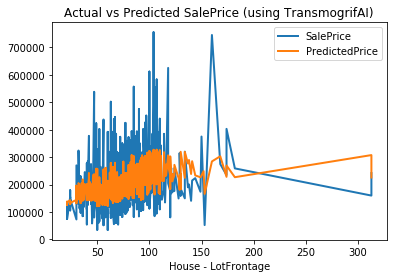

In [46]:
df_a.sort_values(['LotFrontage'], inplace=True)
LotFrontage = df_a['LotFrontage']
SalePrice = df_a['SalePrice']
PredictedPrice = df_a['PredictedPrice']
plt.plot(LotFrontage, SalePrice, lw=2,label="SalePrice")
plt.plot(LotFrontage, PredictedPrice, lw=2,label="PredictedPrice")
plt.title('Actual vs Predicted SalePrice (using TransmogrifAI)')
plt.xlabel('House - LotFrontage')
plt.ylabel('')
plt.legend()
plt.show()

In [49]:
data_lotArea['LotArea'].head()

790    1300
855    1477
509    1491
403    1526
854    1533
Name: LotArea, dtype: int64

In [47]:
raw_data_lotarea = {
        'LotArea': data_lotArea['LotArea'],
        'SalePrice': data_lotArea['SalePrice'], 
        'PredictedPrice': data2['PredictedPrice']}
df_a = pd.DataFrame(raw_data, columns = ['LotArea', 'SalePrice','PredictedPrice'])
df_a.head()

,LotArea,SalePrice,PredictedPrice
0,NaN,181500,174637.817690
1,NaN,223500,204888.307890
2,NaN,140000,154761.235255
3,NaN,250000,257019.898768
4,NaN,143000,245700.250521


In [ ]:
LotFrontage = raw_data['LotFrontage']
SalePrice = df_a['SalePrice']
PredictedPrice = df_a['PredictedPrice']
plt.plot(LotFrontage, SalePrice, lw=2,label="SalePrice")
plt.plot(LotFrontage, PredictedPrice, lw=2,label="PredictedPrice")
plt.title('Actual vs Predicted SalePrice (using TransmogrifAI)')
plt.xlabel('House - LotFrontage')
plt.ylabel('')
plt.legend()
plt.show()